In [1]:
# m_j = m_2
# m_i = m_1  and m_2< equal to m_1.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams



plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3




m_min = 5  #in units of M☉

m_1 = 7   #in units of M☉
m_2 = 9    #in units of M☉



y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print("Δ_1 =", Δ_1_list)



m_1 = m_1_list[0]

m_2 = m_2_list[-1]

Δ_1 = Δ_1_list[0]

Δ_2 = Δ_2_list[-1]


X = np.geomspace(1e-5, 1e5, 1000000) 


m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉
Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


In [2]:
# Probalility distribution of X of PBH binaries without and with halos for PBHs mass range of 5 M☉-100 M☉ .
        
def P_X(m_1, m_2, Δ_1, Δ_2, t_m, X):
    
    def f_(m):
        return f*P(m)

    def f_b(m_1,m_2):
        return  f_(m_1) + f_(m_2)

    def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
        return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))
    
    
    def PDF(m):
        return (P(m)/m)


    I = quad(PDF, m_min, np.inf)             # Taking limits of the PBH mass from m_min M☉ to 100 M☉ instead of 
                                             # 0 to infinity.

    n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
    return  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X)
        
      

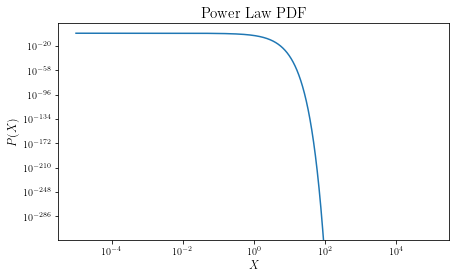

In [3]:
f_pbh = 4.3e-3
f = 0.85*f_pbh
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))



plt.figure(figsize = (7,4))
plt.loglog(X, P_X(m_1, m_2, Δ_1, Δ_2, t_m, X),'C0')
plt.xlabel('$X$', fontsize = 12)
plt.ylabel('$P(X)$', fontsize = 12)
plt.title('Power Law PDF', fontsize = 15)
plt.savefig('P_X_mvsX.pdf', bbox_inches = 'tight')
plt.show()

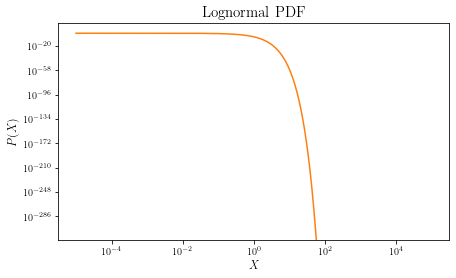

In [4]:
f_pbh = 3.7e-3
f = 0.85*f_pbh 
        
def P(m):                  #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15               #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))



plt.figure(figsize = (7,4))
plt.loglog(X, P_X(m_1, m_2, Δ_1, Δ_2, t_m, X),'C1')
plt.xlabel('$X$', fontsize = 12)
plt.ylabel('$P(X)$', fontsize = 12)
plt.title('Lognormal PDF', fontsize = 15)
plt.show()

In [5]:
# Probability distribution of final merger time of  PBH binaries without and with halos for 
# PBHs mass range of 5 M☉-100 M☉.
        
def P_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence):
    
    def f_(m):
        return f*P(m)

    def f_b(m_1,m_2):
        return  f_(m_1) + f_(m_2)

    def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
        return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))
    
    
    def PDF(m):
        return (P(m)/m)


    I = quad(PDF, m_min, np.inf)             # Taking limits of the PBH mass from m_min M☉ to 100 M☉ instead of 
                                             # 0 to infinity.

    n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
    
    
    
    
    if DM_halos_presence == 'False':
        
        
        
        k = 22.3819
        A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

        def B_nohalo(m_1,m_2,Δ_1,Δ_2):
            return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))

        
        
        def γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X):        #eq.(12) in the notes.
            return (((1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_nohalo(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))
            
       
        
        
        return (1/(7 * t_m))  * ((γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2)))
        
        
        
    else:

        # Merger rate of  PBH binaries with halos for PBHs mass range of 5 M☉-100 M☉ .
        def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
            return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

        def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
            return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))


        def ρ_bar(m):
            return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 

        def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
            return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))


        def M(m, m_1, m_2, Δ_1, Δ_2, X):
            return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))

        

        def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
            return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))


        #Schwarzchild Radius of the PBH.
        def r_s(m): 
            return ((2*G*m)/(c**2)) 


        #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
        def r_ta(m): 
            return ((2*G*m*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/3))


        # The binding energy, E_b of the dark matter halos calculated within r_s and r_ta for dark matter halo's density profile of ρ(r)∝ r^{-9/4}
        def E_b(m): 
            return ((16*π*G*ρ_bar(m)*m*(((r_ta(m))**(-1/4))-((r_s(m))**(-1/4))))-((128/3)*G*(π**2)*(ρ_bar(m)**2)*(((r_ta(m))**(1/2))-((r_s(m))**(1/2)))))



        def a_initial(m_1, m_2, Δ_1, Δ_2, X):
            return  (0.0977* λ(m_1, m_2, Δ_1, Δ_2, X) + 0.0057 * (λ(m_1, m_2, Δ_1, Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))

        def beta(m_1,m_2,Δ_1, Δ_2, X):
            return ((G * m_1 * m_2)/((G * M(m_1, m_1, m_2, Δ_1, Δ_2, X) * M(m_2, m_1, m_2, Δ_1, Δ_2, X))-(2 * a_initial(m_1, m_2, Δ_1, Δ_2, X) * (E_b(m_1) + E_b(m_2)))))


        k = 22.3387
        A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

        def B_halo(m_1,m_2,Δ_1,Δ_2):
            return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7))  *   ((m_1 + m_2)**(-23/42)) * ((f_b(m_1,m_2))**(37/21))* ((f**2 + 0.2998 *(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42)) 

        
        
        def γ_X_halo(m_1,m_2,Δ_1,Δ_2, X):      #eq.(12) in the notes.
            return (((1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_halo(m_1,m_2,Δ_1,Δ_2)   * (X**(-37/21))  * (beta(m_1,m_2,Δ_1, Δ_2, X)**(-1/14)) *  np.sqrt(M_binary_initial(m_1, m_2, Δ_1, Δ_2, X))
        
        
        
        
        return  (1/(7 * t_m)) * ((γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2)))
    

        

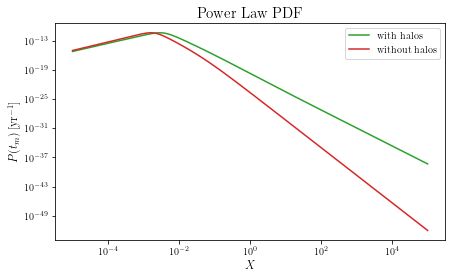

In [6]:
f_pbh = 4.3e-3
f = 0.85*f_pbh
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))



plt.figure(figsize = (7,4))
plt.loglog(X, P_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True'),'C2')
plt.loglog(X, P_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False'),'C3')
plt.xlabel('$X$', fontsize = 12)
plt.ylabel('$P(t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 12)
plt.legend(["with halos","without halos"])
plt.title('Power Law PDF', fontsize = 15)
plt.savefig('P_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

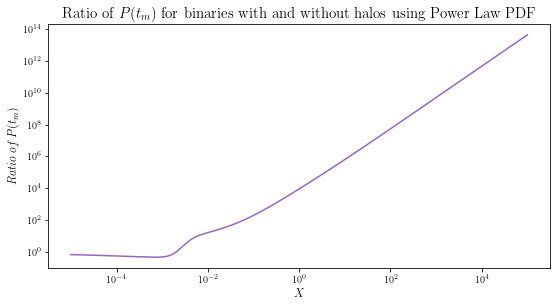

In [7]:
f_pbh = 4.3e-3
f = 0.85*f_pbh
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))


ratio  = P_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True') / P_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False')

plt.figure(figsize = (9, 4.5))
plt.loglog(X, ratio ,'C4')
plt.xlabel('$X$', fontsize = 12)
plt.ylabel('$Ratio \:of\: P(t_{m})$', fontsize = 12)
plt.title('Ratio of $P(t_{m})$ for binaries with and without halos using Power Law PDF', fontsize = 15)
plt.savefig('ratiovsX.pdf', bbox_inches = 'tight')
plt.show()

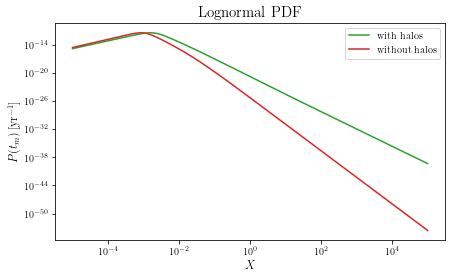

In [8]:
f_pbh = 3.7e-3
f = 0.85*f_pbh 
        
def P(m):                  #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15               #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))



plt.figure(figsize = (7,4))
plt.loglog(X, P_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True'),'C2')
plt.loglog(X, P_tm(m_1, m_2, Δ_1, Δ_2, t_m, X,  DM_halos_presence = 'False'),'C3')
plt.xlabel('$X$', fontsize = 12)
plt.ylabel('$P(t_{m})\: [\mathrm{yr^{-1}}]$', fontsize = 12)
plt.legend(["with halos","without halos"])
plt.title('Lognormal PDF', fontsize = 15)
plt.show()

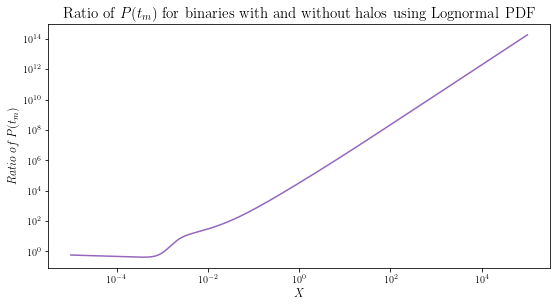

In [9]:
f_pbh = 3.7e-3
f = 0.85*f_pbh 
        
def P(m):                  #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15               #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))



ratio  = P_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True') / P_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False')

plt.figure(figsize = (9, 4.5))
plt.loglog(X, ratio ,'C4')
plt.xlabel('$X$', fontsize = 12)
plt.ylabel('$ Ratio \:of\:  P(t_{m})$', fontsize = 12)
plt.title('Ratio of $P(t_{m})$ for binaries with and without halos using Lognormal PDF', fontsize = 15)
plt.show()

In [10]:
# Product of the probability distribution of the final merger time  and X of PBH binaries 
# without and with halos for PBHs mass range of 5 M☉-100 M☉ .
        
def P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence):
    
    def f_(m):
        return f*P(m)

    def f_b(m_1,m_2):
        return  f_(m_1) + f_(m_2)

    def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
        return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))
    
    
    def PDF(m):
        return (P(m)/m)


    I = quad(PDF, m_min, np.inf)             # Taking limits of the PBH mass from m_min M☉ to 100 M☉ instead of 
                                             # 0 to infinity.

    n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
    
    
    
    
    if DM_halos_presence == 'False':
        
        # Merger rate of  PBH binaries without halos for PBHs mass range of 5 M☉-100 M☉ .
        
        
        k = 22.3819
        A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

        def B_nohalo(m_1,m_2,Δ_1,Δ_2):
            return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))

        
        
        def γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X):        #eq.(12) in the notes.
            return (((1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_nohalo(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))
            
       
        
        
        return (1/(7 * t_m))  * ((γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) 
        
        
        
    else:

       
        def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
            return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

        def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
            return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))


        def ρ_bar(m):
            return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 

        def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
            return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))


        def M(m, m_1, m_2, Δ_1, Δ_2, X):
            return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))

        

        def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
            return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))


        #Schwarzchild Radius of the PBH.
        def r_s(m): 
            return ((2*G*m)/(c**2)) 


        #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
        def r_ta(m): 
            return ((2*G*m*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/3))


        # The binding energy, E_b of the dark matter halos calculated within r_s and r_ta for dark matter halo's density profile of ρ(r)∝ r^{-9/4}
        def E_b(m): 
            return ((16*π*G*ρ_bar(m)*m*(((r_ta(m))**(-1/4))-((r_s(m))**(-1/4))))-((128/3)*G*(π**2)*(ρ_bar(m)**2)*(((r_ta(m))**(1/2))-((r_s(m))**(1/2)))))



        def a_initial(m_1, m_2, Δ_1, Δ_2, X):
            return  (0.0977* λ(m_1, m_2, Δ_1, Δ_2, X) + 0.0057 * (λ(m_1, m_2, Δ_1, Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))

        def beta(m_1,m_2,Δ_1, Δ_2, X):
            return ((G * m_1 * m_2)/((G * M(m_1, m_1, m_2, Δ_1, Δ_2, X) * M(m_2, m_1, m_2, Δ_1, Δ_2, X))-(2 * a_initial(m_1, m_2, Δ_1, Δ_2, X) * (E_b(m_1) + E_b(m_2)))))


        k = 22.3387
        A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

        def B_halo(m_1,m_2,Δ_1,Δ_2):
            return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7))  *   ((m_1 + m_2)**(-23/42)) * ((f_b(m_1,m_2))**(37/21))* ((f**2 + 0.2998 *(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42)) 

        
        
        def γ_X_halo(m_1,m_2,Δ_1,Δ_2, X):      #eq.(12) in the notes.
            return (((1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_halo(m_1,m_2,Δ_1,Δ_2)   * (X**(-37/21))  * (beta(m_1,m_2,Δ_1, Δ_2, X)**(-1/14)) *  np.sqrt(M_binary_initial(m_1, m_2, Δ_1, Δ_2, X))
        
        
        
        
        return  (1/(7 * t_m)) * ((γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) 
    

        

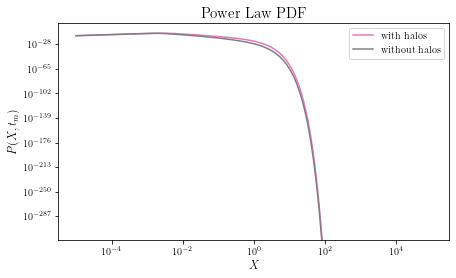

In [11]:
f_pbh = 4.3e-3
f = 0.85*f_pbh
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))



plt.figure(figsize = (7,4))
plt.loglog(X, P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True'),'C6')
plt.loglog(X, P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False'),'C7')
plt.xlabel('$X$', fontsize = 12)
plt.ylabel('$P(X, t_{m})$', fontsize = 12)
plt.legend(["with halos","without halos"])
plt.title('Power Law PDF', fontsize = 15)
plt.savefig('P_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

/tmp/ipykernel_15925/2494973587.py:11: RuntimeWarning: divide by zero encountered in true_divide
  Ratio =  P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True') /  P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X,  DM_halos_presence = 'False')
/tmp/ipykernel_15925/2494973587.py:11: RuntimeWarning: invalid value encountered in true_divide
  Ratio =  P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True') /  P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X,  DM_halos_presence = 'False')


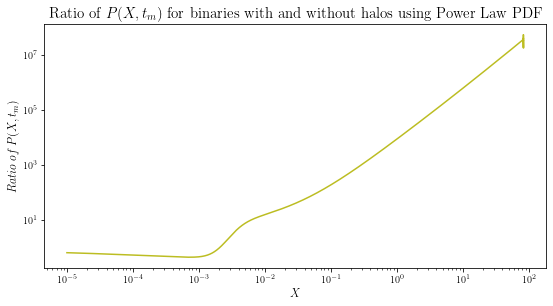

In [12]:
f_pbh = 4.3e-3
f = 0.85*f_pbh
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))


Ratio =  P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True') /  P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X,  DM_halos_presence = 'False')

plt.figure(figsize = (9,4.5))
plt.loglog(X,Ratio,'C8')
plt.xlabel('$X$', fontsize = 12)
plt.ylabel('$Ratio \: of \:  P(X, t_{m})$', fontsize = 12)
plt.title('Ratio of $P(X, t_{m})$ for binaries with and without halos using Power Law PDF', fontsize = 15)
plt.savefig('RP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

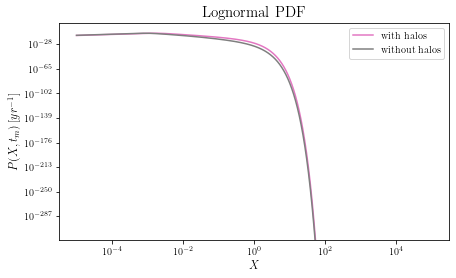

In [13]:
f_pbh = 3.7e-3
f = 0.85*f_pbh 
        
def P(m):                  #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15               #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))



plt.figure(figsize = (7,4))
plt.loglog(X, P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True'),'C6')
plt.loglog(X, P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False'),'C7')
plt.xlabel('$X$', fontsize = 12)
plt.ylabel('$P(X, t_{m})\: [yr^{-1}]$', fontsize = 12)
plt.legend(["with halos","without halos"])
plt.title('Lognormal PDF', fontsize = 15)
plt.show()

/tmp/ipykernel_15925/2554255320.py:11: RuntimeWarning: divide by zero encountered in true_divide
  Ratio =  P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True') /  P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False')
/tmp/ipykernel_15925/2554255320.py:11: RuntimeWarning: invalid value encountered in true_divide
  Ratio =  P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True') /  P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False')


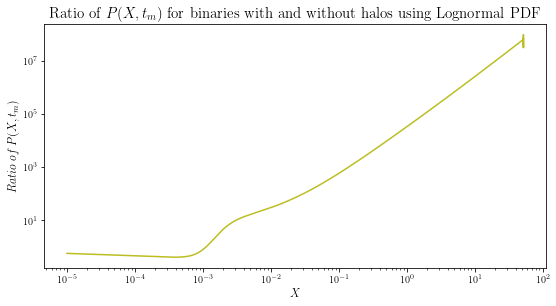

In [14]:
f_pbh = 3.7e-3
f = 0.85*f_pbh 
        
def P(m):                  #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15               #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))



Ratio =  P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True') /  P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False')

plt.figure(figsize = (9,4.5))
plt.loglog(X,Ratio,'C8')
plt.xlabel('$X$', fontsize = 12)
plt.ylabel('$Ratio \: of \:  P(X, t_{m})$', fontsize = 12)
plt.title('Ratio of $P(X, t_{m})$ for binaries with and without halos using Lognormal PDF', fontsize = 15)
plt.show()